# Project: Analysis and Vizualization on Adult Census Data

---

## About the Data 
- This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
- Description of fnlwgt (final weight)
  - The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
- A single cell estimate of the population 16+ for each state.
- Controls for Hispanic Origin by age and sex.
- Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


----
### **Problem Description**

- Use basic visualization techniques to gain an initial understanding of the dataset. Specifically, you are required to visualize the relationship between each attribute and the class label. For a continuous attribute, you might need to discretize it first using a simple strategy such as equi-width. Please experiment with at least three different bin widths if you decide to discretize a continuous attribute. Observe these basic visualizations and summarize your main insights. You are strongly recommended to use Tableau for this task.

- Handling missing values: suggest and implement at least two strategies to handle the missing values for categorical and numeric attributes, respectively.  These strategies should be based on your observations made in the previous step.

- Implement a Naïve Bayesian Classifier for this dataset. This dataset contains continuous attributes. Take the following two different approaches to handle a continuous attribute:

  - (1) using the equal-width binning method to transform this attribute into a categorical attribute before building the classifier. Select a “proper” width based on your observations made in step (i); 
  - (2) assume this attribute follows a Gaussian distribution.
    - Implement the k-fold cross validation strategy and evaluate your classifier by setting k=10.  Also evaluate the impact of different strategies implemented in step (ii) for missing values and the two approaches for handling continuous attributes in step (iii).

---
### 1. **Imports, Initial Setup and Data Overview**



In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score

In [11]:
df1 = pd.read_csv("/Users/azuga/Desktop/R-C/pythonProject/adult_census_data/adult.csv")
df1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [12]:
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

--- 
### 2. **Data Cleaning**

- **Droping unwanted columns**

In [13]:
df1.drop(['relationship','capital.gain','capital.loss'],axis=1,inplace=True)
df1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,race,sex,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,White,Female,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,White,Female,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Black,Female,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,White,Female,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,White,Female,40,United-States,<=50K


In [14]:
l=df1.columns

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   hours.per.week  32561 non-null  int64 
 10  native.country  32561 non-null  object
 11  income          32561 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.0+ MB


- **Cleaning the string data**

In [16]:
for i in l:
    if df1[i].dtype=='object':
        df1[i] = df1[i].str.strip()

- **Removing the '?' from the dataset**

In [17]:
b=[]
for i in df1.columns:
    for j in range(df1.shape[0]):
        if df1[i][j]=='?':
            b.append(j)
df1.drop(index=b,inplace=True)
print(len(b))

4262


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   hours.per.week  30162 non-null  int64 
 10  native.country  30162 non-null  object
 11  income          30162 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.0+ MB


- **Checking for null values**

In [19]:
df1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
race              0
sex               0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [20]:
df1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,race,sex,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,White,Female,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,White,Female,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,White,Female,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,White,Female,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,White,Male,40,United-States,<=50K


---
### 3. **Exploratory Data Analysis**

*- [Visualizing income for different features]*

<Axes: xlabel='education'>

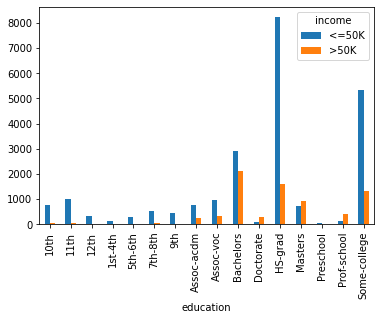

In [21]:
inc_gen = pd.crosstab(df1['education'],df1['income'])
inc_gen.plot(kind='bar')

<Axes: xlabel='income'>

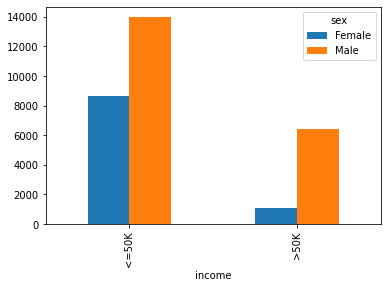

In [22]:
inc_gen = pd.crosstab(df1['income'],df1['sex'])
inc_gen.plot(kind='bar')

<Axes: xlabel='workclass'>

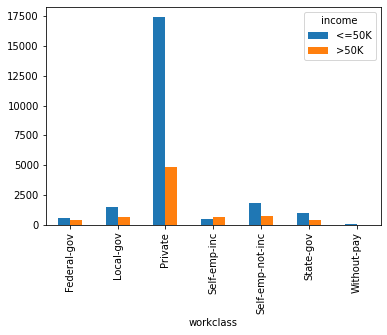

In [23]:
inc_wc = pd.crosstab(df1['workclass'],df1['income'],)
inc_wc.plot(kind='bar')

*- [Visualizing categorical data]*

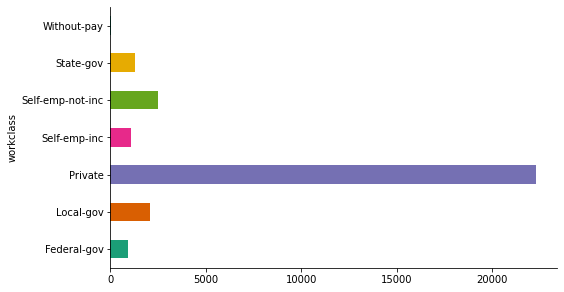

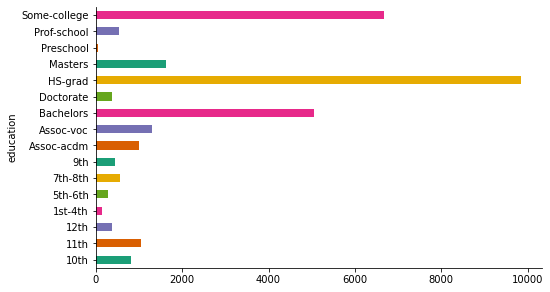

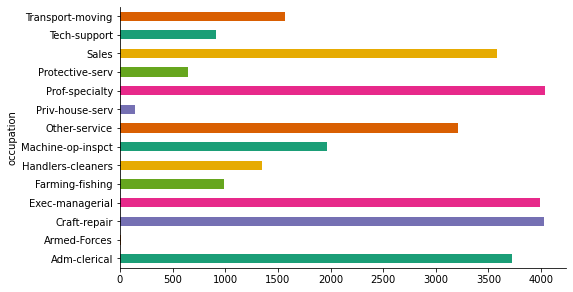

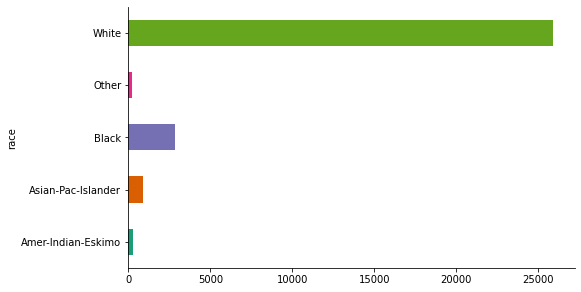

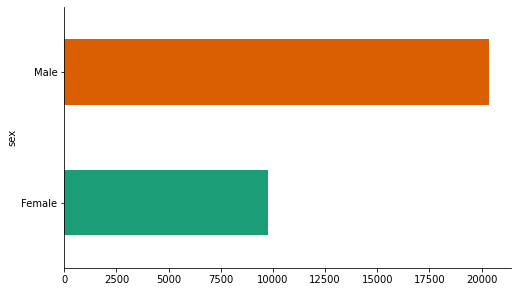

In [24]:
def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return plt.show()
b=['workclass','education','occupation','race','sex']
for i in b:
  categorical_histogram(df1, *[i], **{})

- *[Encoding the income values]*

In [25]:
df1['income']=df1['income'].apply(lambda x: 0 if x=='<=50K' else 1 )

In [26]:
df1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,race,sex,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,White,Female,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,White,Female,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,White,Female,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,White,Female,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,White,Male,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,White,Male,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,White,Female,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,White,Male,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,White,Female,40,United-States,0


- *[Visualizing co relation between numerical features]*

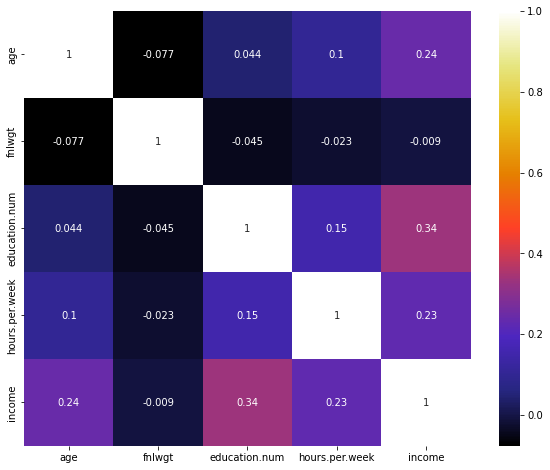

In [27]:
# Assuming df1 is your DataFrame
# Select only the numerical columns from df1
numerical_columns = df1.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical columns
corr_matrix = numerical_columns.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="CMRmap", annot=True)
plt.show()

In [28]:
df1.drop(['fnlwgt'],axis=1,inplace=True)
df1.head()

,age,workclass,education,education.num,marital.status,occupation,race,sex,hours.per.week,native.country,income
1,82,Private,HS-grad,9,Widowed,Exec-managerial,White,Female,18,United-States,0
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,White,Female,40,United-States,0
4,41,Private,Some-college,10,Separated,Prof-specialty,White,Female,40,United-States,0
5,34,Private,HS-grad,9,Divorced,Other-service,White,Female,45,United-States,0
6,38,Private,10th,6,Separated,Adm-clerical,White,Male,40,United-States,0


---
### 4. **Data Preparation**
- Deep dive into X, and Y
- Encoding the categorical Data
- Train and Test data
- Feature Scaling


In [29]:
obj=[]
for i in df1.columns:
    if df1[i].dtype=='object':
        obj.append(i)
obj

['workclass',
 'education',
 'marital.status',
 'occupation',
 'race',
 'sex',
 'native.country']

In [30]:
y=df1['income']
x=df1.drop(['income'],axis=1)

In [31]:
encoder = OrdinalEncoder()
for i in obj:
  x[i] = encoder.fit_transform(np.array(x[i]).reshape(-1,1))

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [33]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

---
### 5. **Model Building**

- ####  A. **[Logistic regression]**

In [34]:
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = classifier_lr.predict(X_test)

In [36]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5245  404]
 [1153  739]]


0.7935287097201963

- #### B). **[Random Forest Classifier]**

In [37]:
classifier_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [38]:
y_pred = classifier_rf.predict(X_test)

In [39]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5078  571]
 [ 830 1062]]


0.8142156212703885

- #### C. **[Naive Bayes Classifier]**

     - Defined Gaussian Naive Bayes from scratch 

In [40]:
class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.num_classes = len(self.classes)
        self.priors = np.zeros(self.num_classes)
        self.means = np.zeros((self.num_classes, X.shape[1]))
        self.variances = np.zeros((self.num_classes, X.shape[1]))
        
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.priors[i] = len(X_c) / len(X)
            self.means[i] = X_c.mean(axis=0)
            self.variances[i] = X_c.var(axis=0)
    
    def calculate_likelihood(self, x, mean, variance):
        exponent = -((x - mean) ** 2) / (2 * variance)
        return (1 / (np.sqrt(2 * np.pi * variance))) * np.exp(exponent)
    
    def predict(self, X):
        y_pred = []
        
        for x in X:
            class_probs = []
            for i in range(self.num_classes):
                prior = np.log(self.priors[i])
                likelihoods = np.log(self.calculate_likelihood(x, self.means[i], self.variances[i]))
                class_prob = prior + np.sum(likelihoods)
                class_probs.append(class_prob)
            
            predicted_class = self.classes[np.argmax(class_probs)]
            y_pred.append(predicted_class)
        
        return np.array(y_pred)



In [41]:
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [42]:
y_pred = classifier_nb.predict(X_test)

In [43]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4650  999]
 [ 623 1269]]


0.7849091632409495